In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Datos_de_LosAngeles_EstadosUnidos_sin_nulos.csv')

In [3]:
#Verificamos informacion del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    45533 non-null  int64  
 1   last_scraped                                  45533 non-null  int64  
 2   source                                        45533 non-null  object 
 3   description                                   45533 non-null  object 
 4   neighborhood_overview                         45533 non-null  object 
 5   host_name                                     45533 non-null  object 
 6   host_since                                    45533 non-null  float64
 7   host_response_time                            45533 non-null  object 
 8   host_acceptance_rate                          45533 non-null  float64
 9   host_is_superhost                             45533 non-null 

In [5]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0


In [6]:
#Eliminamos la columna Unnamed.
data = data.drop('Unnamed: 0', axis=1)

In [7]:
#Verificamos informacion del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  45533 non-null  int64  
 1   source                                        45533 non-null  object 
 2   description                                   45533 non-null  object 
 3   neighborhood_overview                         45533 non-null  object 
 4   host_name                                     45533 non-null  object 
 5   host_since                                    45533 non-null  float64
 6   host_response_time                            45533 non-null  object 
 7   host_acceptance_rate                          45533 non-null  float64
 8   host_is_superhost                             45533 non-null  object 
 9   host_neighbourhood                            45533 non-null 

In [8]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas= data.iloc[ : , np.r_[5, 7, 10, 15, 16, 21, 22, 24, 27:32, 38:43, 49]]
cualitativas= data.iloc[ : , np.r_[0:4, 6, 8, 9, 11:14, 17:20, 23, 25, 26, 33:37, 44:48] ]

<Figure size 1500x800 with 0 Axes>

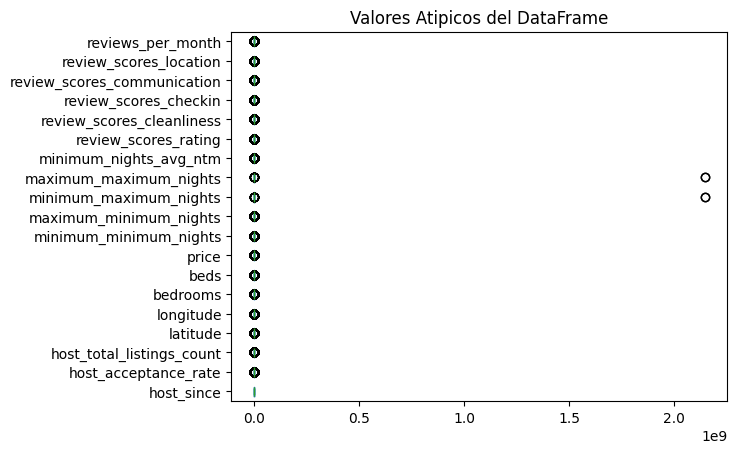

In [9]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del DataFrame")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACION ESTANDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [10]:
#Metodo aplicando desviacion estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_since                     4.694134e+04
host_acceptance_rate           1.470173e+00
host_total_listings_count      2.184282e+03
latitude                       3.447949e+01
longitude                     -1.177961e+02
bedrooms                       5.668776e+00
beds                           7.175669e+00
price                          2.231685e+03
minimum_minimum_nights         1.037096e+02
maximum_minimum_nights         1.591868e+02
minimum_maximum_nights         4.279203e+07
maximum_maximum_nights         4.279206e+07
minimum_nights_avg_ntm         1.058397e+02
review_scores_rating           5.889372e+00
review_scores_cleanliness      5.924263e+00
review_scores_checkin          5.835954e+00
review_scores_communication    5.867675e+00
review_scores_location         5.792568e+00
reviews_per_month              5.784964e+00
dtype: float64
Limite inferior permitido host_since                     3.909548e+04
host_acceptance_rate           2.792908e-01
host_tota

In [11]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_since,host_acceptance_rate,host_total_listings_count,latitude,longitude,bedrooms,beds,price,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,41294.0,0.41,194.0,34.049660,-118.435550,3.0,3.0,399.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
1,43668.0,0.90,1.0,34.048410,-118.387510,2.0,2.3,289.4,30.0,30.0,270.0,270.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
2,45054.0,NaN,5.0,34.070583,-118.390742,3.0,3.0,434.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
3,44522.0,0.56,25.0,34.109329,-118.073098,1.0,1.0,49.0,1.0,1.0,365.0,365.0,1.0,NaN,5.00,5.00,5.00,5.00,0.06
4,45136.0,0.95,5.0,34.015590,-118.494080,0.0,1.0,231.0,1.0,5.0,1125.0,1125.0,4.9,4.93,4.98,4.93,5.00,4.73,3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,42748.0,1.00,1.0,33.976649,-118.457536,1.0,2.3,289.4,1.0,1.0,365.0,365.0,1.0,4.90,4.90,5.00,5.00,4.90,0.80
45529,45133.0,0.90,1.0,34.049102,-118.247411,1.8,2.3,289.4,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
45530,44855.0,1.00,3.0,33.788520,-118.171780,2.0,2.3,289.4,31.0,31.0,365.0,365.0,31.0,4.90,4.90,5.00,5.00,4.90,0.80
45531,41498.0,1.00,5.0,34.027010,-118.326880,0.0,1.0,116.0,2.0,2.0,1125.0,1125.0,2.0,4.84,4.73,4.92,4.94,4.78,3.20


In [12]:
#Corroboramos valores nulos del dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

host_since                        0
host_acceptance_rate           1468
host_total_listings_count       896
latitude                       1000
longitude                       444
bedrooms                        620
beds                            525
price                           449
minimum_minimum_nights          254
maximum_minimum_nights          697
minimum_maximum_nights            2
maximum_maximum_nights            2
minimum_nights_avg_ntm          271
review_scores_rating            710
review_scores_cleanliness       754
review_scores_checkin           550
review_scores_communication     629
review_scores_location          668
reviews_per_month               857
dtype: int64

In [13]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Reemplazamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_since,host_acceptance_rate,host_total_listings_count,latitude,longitude,bedrooms,beds,price,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,41294.0,0.41,194.0,34.049660,-118.435550,3.0,3.0,399.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
1,43668.0,0.90,1.0,34.048410,-118.387510,2.0,2.3,289.4,30.0,30.0,270.0,270.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
2,45054.0,0.90,5.0,34.070583,-118.390742,3.0,3.0,434.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
3,44522.0,0.56,25.0,34.109329,-118.073098,1.0,1.0,49.0,1.0,1.0,365.0,365.0,1.0,4.80,5.00,5.00,5.00,5.00,0.06
4,45136.0,0.95,5.0,34.015590,-118.494080,0.0,1.0,231.0,1.0,5.0,1125.0,1125.0,4.9,4.93,4.98,4.93,5.00,4.73,3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,42748.0,1.00,1.0,33.976649,-118.457536,1.0,2.3,289.4,1.0,1.0,365.0,365.0,1.0,4.90,4.90,5.00,5.00,4.90,0.80
45529,45133.0,0.90,1.0,34.049102,-118.247411,1.8,2.3,289.4,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
45530,44855.0,1.00,3.0,33.788520,-118.171780,2.0,2.3,289.4,31.0,31.0,365.0,365.0,31.0,4.90,4.90,5.00,5.00,4.90,0.80
45531,41498.0,1.00,5.0,34.027010,-118.326880,0.0,1.0,116.0,2.0,2.0,1125.0,1125.0,2.0,4.84,4.73,4.92,4.94,4.78,3.20


In [14]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_since                     0
host_acceptance_rate           0
host_total_listings_count      0
latitude                       0
longitude                      0
bedrooms                       0
beds                           0
price                          0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
reviews_per_month              0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [15]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0:25 y 0:75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_since                     47218.000000
host_acceptance_rate               1.140000
host_total_listings_count         42.000000
latitude                          34.272515
longitude                       -117.964707
bedrooms                           3.500000
beds                               6.000000
price                            558.500000
minimum_minimum_nights            73.500000
maximum_minimum_nights            72.000000
minimum_maximum_nights          2265.000000
maximum_maximum_nights          2265.000000
minimum_nights_avg_ntm            72.000000
review_scores_rating               5.235000
review_scores_cleanliness          5.230000
review_scores_checkin              5.135000
review_scores_communication        5.120000
review_scores_location             5.220000
reviews_per_month                  3.415000
dtype: float64
Limite inferior permitido host_since                     38938.000000
host_acceptance_rate               0.740000
host_tota

In [16]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_since,host_acceptance_rate,host_total_listings_count,latitude,longitude,bedrooms,beds,price,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,41294.0,NaN,NaN,34.049660,-118.435550,3.0,3.0,399.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
1,43668.0,0.90,1.0,34.048410,-118.387510,2.0,2.3,289.4,30.0,30.0,270.0,270.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
2,45054.0,NaN,5.0,34.070583,-118.390742,3.0,3.0,434.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
3,44522.0,NaN,25.0,34.109329,-118.073098,1.0,1.0,49.0,1.0,1.0,365.0,365.0,1.0,NaN,5.00,5.00,5.00,5.00,0.06
4,45136.0,0.95,5.0,34.015590,-118.494080,0.0,1.0,231.0,1.0,5.0,1125.0,1125.0,4.9,4.93,4.98,4.93,5.00,4.73,3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,42748.0,1.00,1.0,33.976649,-118.457536,1.0,2.3,289.4,1.0,1.0,365.0,365.0,1.0,4.90,4.90,5.00,5.00,4.90,0.80
45529,45133.0,0.90,1.0,34.049102,-118.247411,1.8,2.3,289.4,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
45530,44855.0,1.00,3.0,NaN,-118.171780,2.0,2.3,289.4,31.0,31.0,365.0,365.0,31.0,4.90,4.90,5.00,5.00,4.90,0.80
45531,41498.0,1.00,5.0,34.027010,-118.326880,0.0,1.0,116.0,2.0,2.0,1125.0,1125.0,2.0,4.84,4.73,4.92,4.94,4.78,3.20


In [17]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_since                        0
host_acceptance_rate           5948
host_total_listings_count      7000
latitude                       4280
longitude                      2744
bedrooms                       4470
beds                            905
price                          3170
minimum_minimum_nights          437
maximum_minimum_nights          942
minimum_maximum_nights           13
maximum_maximum_nights           14
minimum_nights_avg_ntm          458
review_scores_rating           4432
review_scores_cleanliness      5260
review_scores_checkin          5291
review_scores_communication    5713
review_scores_location         4311
reviews_per_month              4301
dtype: int64

In [18]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Reemplazamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_since,host_acceptance_rate,host_total_listings_count,latitude,longitude,bedrooms,beds,price,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,41294.0,0.90,7.2,34.049660,-118.435550,3.0,3.0,399.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
1,43668.0,0.90,1.0,34.048410,-118.387510,2.0,2.3,289.4,30.0,30.0,270.0,270.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
2,45054.0,0.90,5.0,34.070583,-118.390742,3.0,3.0,434.0,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
3,44522.0,0.90,25.0,34.109329,-118.073098,1.0,1.0,49.0,1.0,1.0,365.0,365.0,1.0,4.90,5.00,5.00,5.00,5.00,0.06
4,45136.0,0.95,5.0,34.015590,-118.494080,0.0,1.0,231.0,1.0,5.0,1125.0,1125.0,4.9,4.93,4.98,4.93,5.00,4.73,3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,42748.0,1.00,1.0,33.976649,-118.457536,1.0,2.3,289.4,1.0,1.0,365.0,365.0,1.0,4.90,4.90,5.00,5.00,4.90,0.80
45529,45133.0,0.90,1.0,34.049102,-118.247411,1.8,2.3,289.4,30.0,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
45530,44855.0,1.00,3.0,34.100000,-118.171780,2.0,2.3,289.4,31.0,31.0,365.0,365.0,31.0,4.90,4.90,5.00,5.00,4.90,0.80
45531,41498.0,1.00,5.0,34.027010,-118.326880,0.0,1.0,116.0,2.0,2.0,1125.0,1125.0,2.0,4.84,4.73,4.92,4.94,4.78,3.20


In [19]:
#Unimos el dataframe cuantitativos limpios con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,last_scraped,source,description,neighborhood_overview,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,...,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,45540,city scrape,The whole group will enjoy easy access to ever...,No overview available,within a few hours,f,Brentwood,"['email', 'phone']",t,t,...,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
1,45540,previous scrape,No description available,No overview available,Unknown,f,South Robertson,"['email', 'phone']",t,f,...,30.0,270.0,270.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
2,45540,city scrape,"Charming, renovated home in the Beverly Hills ...",No overview available,within a day,f,Unknown,"['email', 'phone']",f,t,...,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
3,45539,city scrape,Relax in this unique and serene retreat.,No overview available,a few days or more,f,Walnut Valley,['phone'],t,t,...,1.0,365.0,365.0,1.0,4.90,5.00,5.00,5.00,5.00,0.06
4,45540,city scrape,Welcome to our stunning apartment nestled in t...,No overview available,within an hour,t,Downtown,['phone'],t,t,...,5.0,1125.0,1125.0,4.9,4.93,4.98,4.93,5.00,4.73,3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,45540,previous scrape,No description available,No overview available,Unknown,f,Unknown,"['email', 'phone']",t,t,...,1.0,365.0,365.0,1.0,4.90,4.90,5.00,5.00,4.90,0.80
45529,45540,previous scrape,You'll have a great time at this comfortable p...,No overview available,Unknown,f,Downtown Los Angeles,['phone'],f,t,...,30.0,365.0,365.0,30.0,4.90,4.90,5.00,5.00,4.90,0.80
45530,45540,previous scrape,Enjoy easy access to popular shops and restaur...,No overview available,within an hour,f,Whittier,"['email', 'phone']",t,t,...,31.0,365.0,365.0,31.0,4.90,4.90,5.00,5.00,4.90,0.80
45531,45540,city scrape,Peaceful private studio in lovely Jefferson Pa...,Jefferson Park is a historical neighborhood wi...,within an hour,t,Unknown,"['email', 'phone', 'work_email']",t,t,...,2.0,1125.0,1125.0,2.0,4.84,4.73,4.92,4.94,4.78,3.20


In [20]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_response_time                              0
host_is_superhost                               0
host_neighbourhood                              0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
property_type                                   0
room_type                                       0
accommodates                                    0
amenities                                       0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
calendar_last_scraped                           0
number_of_reviews                               0
number_of_reviews_ltm                           0


In [21]:
#Convertir DataFrame
Datos_limpios.to_csv("Datos_limpios_Los_Angeles_Estados_Unidos.csv")